# Feature Engineering

In [39]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [40]:
data = pd.read_csv('covtype.csv')

In [41]:
#data.info() // no null values in the data
#data.shape  // (581012,55)
print(list(data.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [42]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

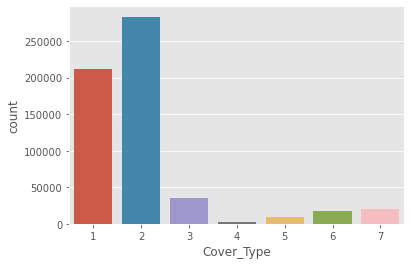

In [43]:
sb.countplot(x = 'Cover_Type', data = data)

In [44]:
numerical_data = data.iloc[:,:10]
numerical_columns = data.iloc[:,:10].columns
numerical_columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

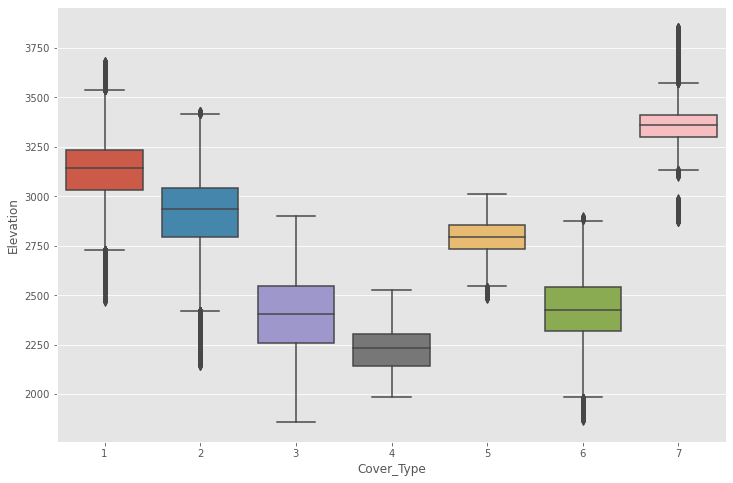

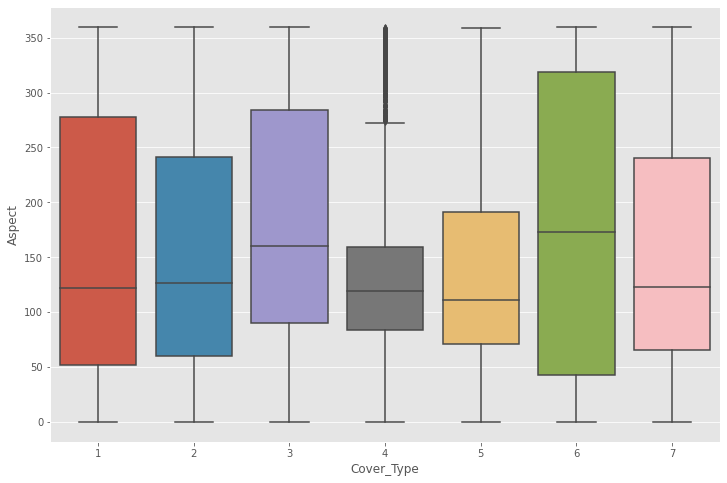

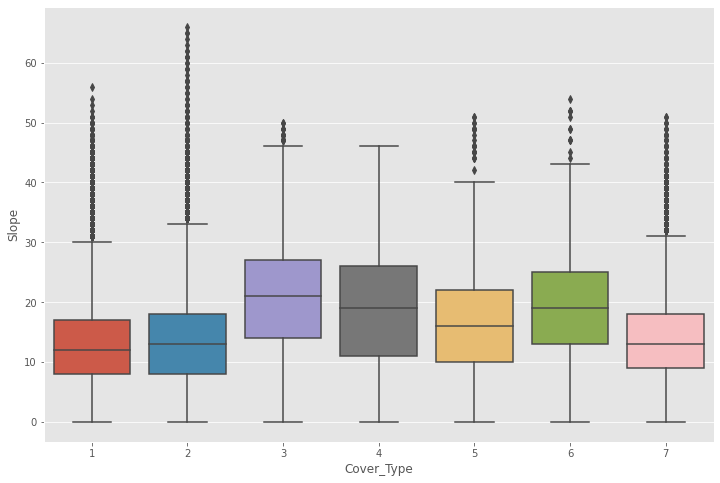

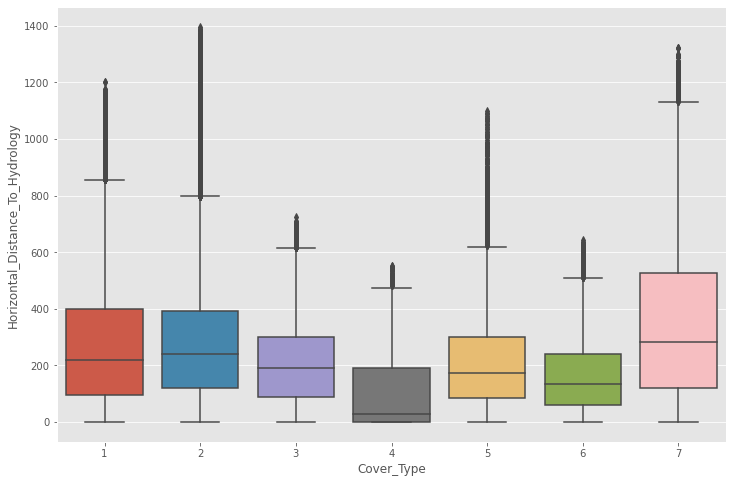

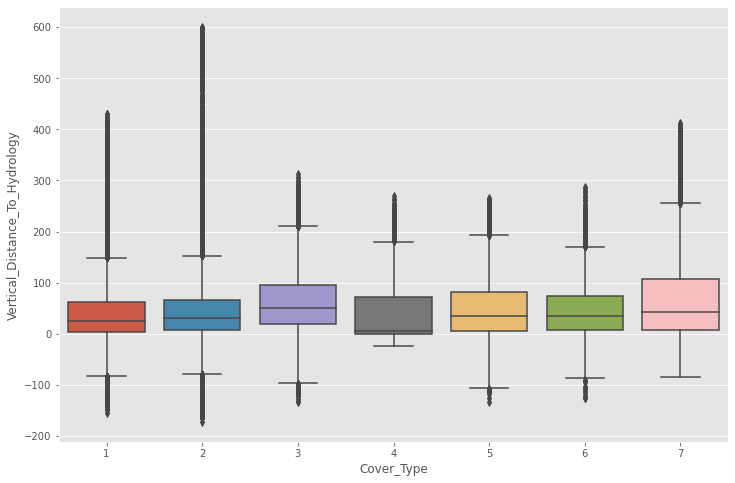

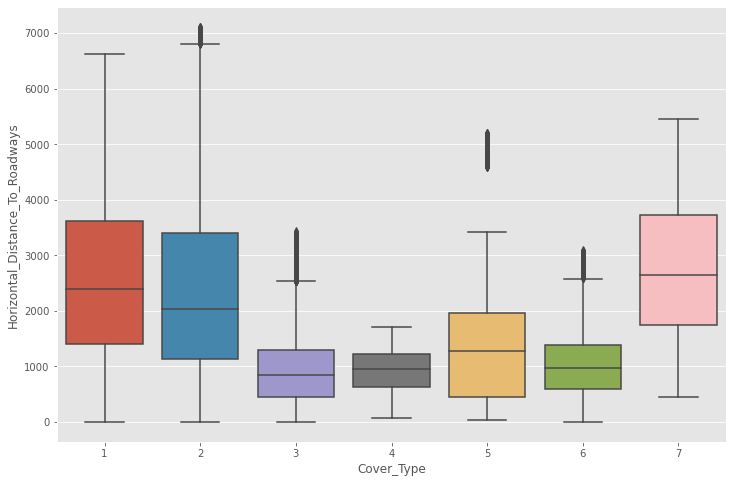

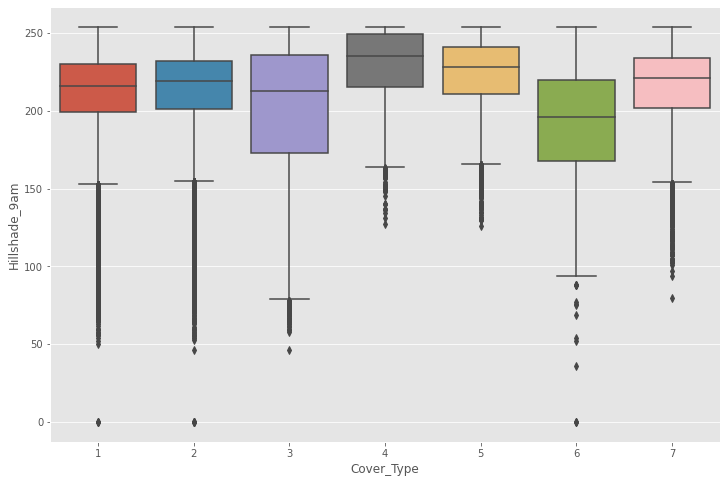

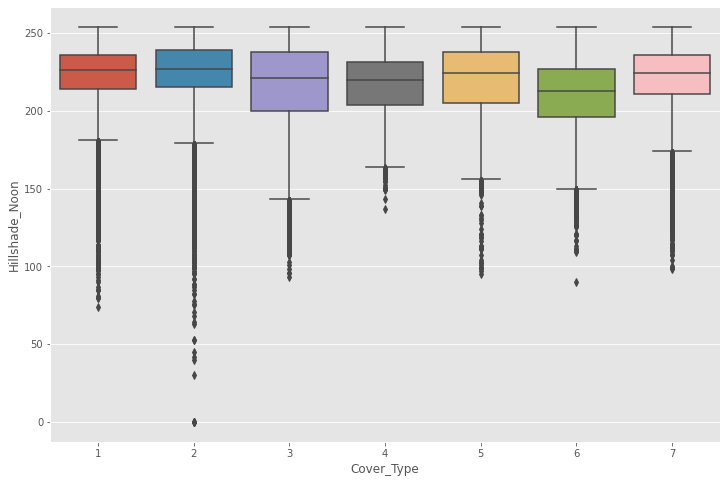

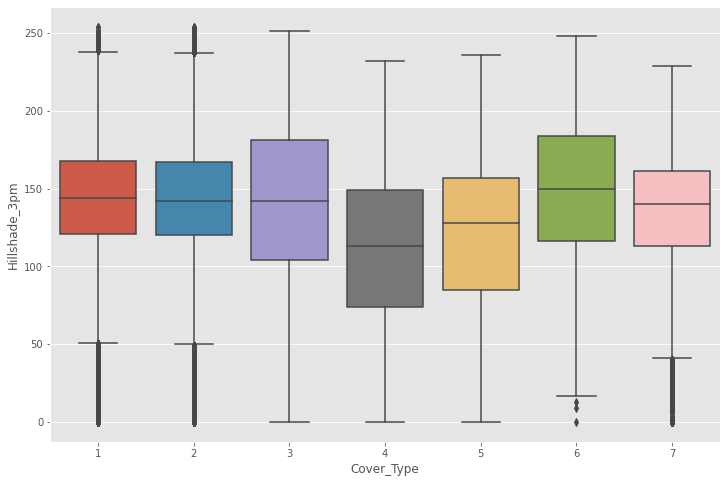

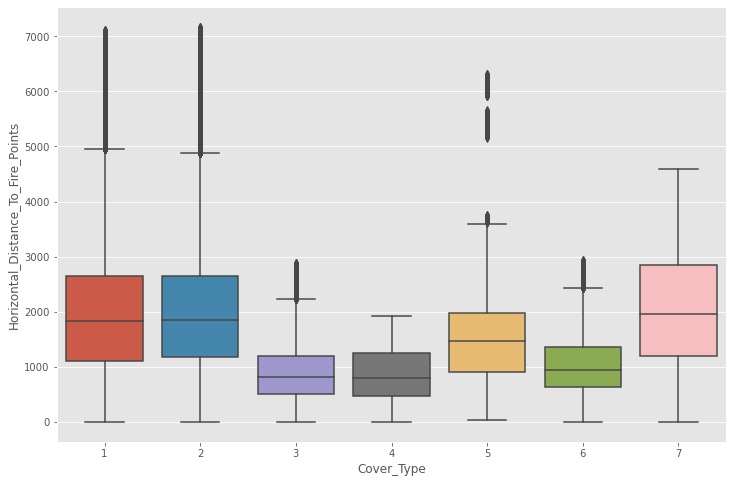

In [45]:
for i in numerical_columns:
    plt.style.use('ggplot')
    data_data = data.copy()
    plt.figure(figsize = (12,8))
    sb.boxplot(x= data_data['Cover_Type'], y = data_data[i])
    plt.show()
     
    
    

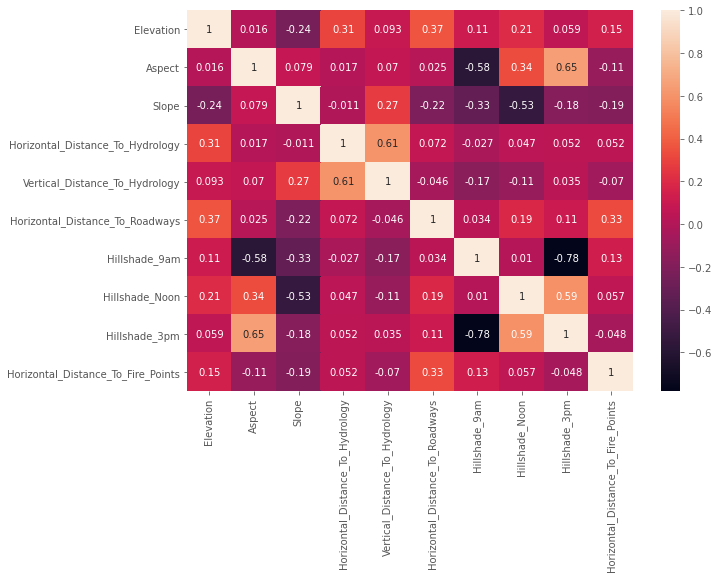

In [47]:
plt.figure(figsize = (10,7))
sb.heatmap(numerical_data.corr(), annot = True)

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#separate features and target
feature = data.iloc[:, :54] #Features of data
y = data.iloc[:, 54]  #Target of data

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, y)

model = SelectFromModel(ETC, prefit=True)
X = model.transform(feature) #new features

In [51]:
X.shape , y.shape

((581012, 12), (581012,))

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.26)

In [54]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC(n_estimators = 100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
predictions = model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions, y_test)

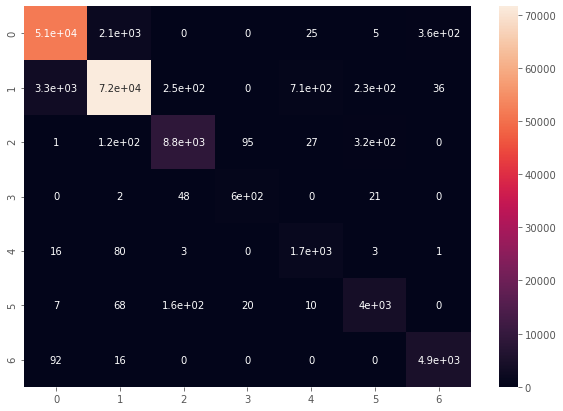

In [57]:
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot = True)

In [59]:
from sklearn.metrics import accuracy_score
score = accuracy_score(predictions, y_test)
print("Accuracy :", score)

Accuracy : 0.9464994969019753
